# Census Income Project

#### Problem Statement

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

#### Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for them by Population Division here at the Census Bureau. 

They use 3 sets of controls. These are:

1. A single cell estimate of the population 16+ for each state.
1. Controls for Hispanic Origin by age and sex.
1. Controls by Race, age and sex.


They use all three sets of controls in weighting program and "rake" through them 6 times so that by the end they come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



# 1- Importing Libraries and Loading the Dataset

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Census_Income.csv")
pd. set_option('display.max_columns', 500)
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


**The dataset above shows various columns both numerical and categorical. There are columns with values ) in it. We will further go to EDA.**

# 2- Exploratory Data Analysis

## 2.1 Data Exploration

In [3]:
df.shape

(32560, 15)

We have 32,560 rows and 15 columns for our dataste. Its a pretty big population.

In [4]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

### Variable description

* Age: Describes the age of individuals. Continuous.
* Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* fnlwgt:  Final sampling weight. Inverse of sampling fraction adjusted for non-response and over or under sampling of particular groups.Continuous.
* education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* education-num: number of class. Continuous.
* marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* sex: Female, Male.
* capital-gain:  how much during the time capital was gained.Continuous.
* capital-loss: how much during the time capital was lost.Continuous.
* hours-per-week: working hours per week. Continuous.
* native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* salary: >50K,<=50K

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**Observation:**

* The dataset contains no null values.
* Age, Final Weight, Education Number, Capital Gain, Capital Loss and Hours Per Week are integer columns.
* There are no Float Datatypes in the dataset.
* Workclass, Education, Marital Status, Occupation, Relationship, Race, Sec, Native Country and Income are of object datatypes.
* Although the dataset does not contain any null values, a closer look tells us that there are a lot of '?' values in our dataset. We will have to replace those values!

In [6]:
cat_cols=["Workclass","Education","Marital_status","Occupation","Relationship","Race","Sex","Native_country","Income"]
num_cols=["Age","Fnlwgt","Education_num","Capital_gain","Capital_loss","Hours_per_week"]

In [7]:
#Lets check if there are Null values

df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

At first look, there are no null values. However we can see many missing. Lets take unique values.

In [8]:
#checking the unique value counts of each feature

df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [9]:
#lets check the missing value or? in categorical columns

for i in df[cat_cols]:
    print(df[i].value_counts())
    print('**************')
    print("               ")

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
**************
               
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
**************
               
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64
********

**We have ? in Workclass, Occupation and Native_country** we can replace it by Mode of the column as these are all Categorical columns

In [10]:
#Replacing '?' with mode value. Private

df['Workclass'] = df.Workclass.str.replace('?', 'Private')

In [11]:
#Replacing '?' with mode value. Prof-speciality

df['Occupation'] = df.Occupation.str.replace('?', 'Prof-specialty')

In [12]:
#Replacing '?' with mode value. United-States

df['Native_country'] = df.Native_country.str.replace('?', 'United-States')

In [13]:
cols=["Age","Education_num","Capital_gain","Capital_loss","Hours_per_week"]

for i in df[cols]:
    print(df[i].value_counts())
    print('**************')
    print("               ")

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64
**************
               
9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64
**************
               
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64
**************
               
0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64
**************
               
40    15216
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
94        

**We can see many 0's in Capital gain and Capital Loss. We can drop those columns as more than 90% is missing**

In [14]:
#Droping Capital_gain and capital_loss columns

df = df.drop(["Capital_gain"],axis=1)
df = df.drop(["Capital_loss"],axis=1)

In [15]:
#check the new df

df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


#### Our data is more clean and good to go

In [16]:
#Describing the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


* We can see that only 4 INT values in our datastet.
* In age, we can see Minimum age of 17 and Maximum age of 90.
* Education_num shows that there classes from 1 to 16.
* Also, we can see that we have minimu hours from 1 to maximum 99 hours.
* The count for all is 32,560.
* We might not have skewness in the dataset as mean and median are almost same.

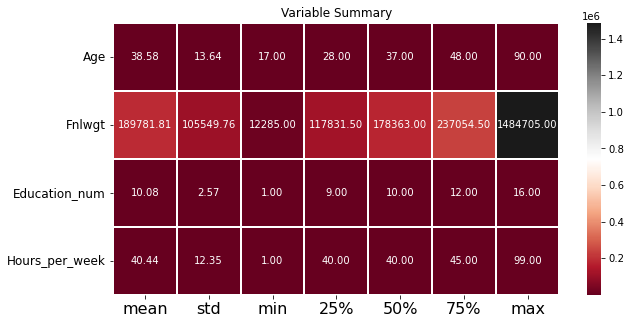

In [17]:
#Heatmap of the Descibe function

plt.figure(figsize=(10,5))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='.2f',cmap='RdGy')
plt.xticks(fontsize=16)
plt.yticks(fontsize=12)
plt.title('Variable Summary')
plt.show()

* We can see that Fnlwgt has lot of Outliers and variations in data minimum value and Maximum value. We can drop this column if outliers are huge.

## 2.2 Data Visualization

### 2.2.1 Univariate Analysis

#### We have Numerical(num_cols) and Categorigal(cat_cols) columns in our dataset.

In [18]:
num_cols=["Age","Fnlwgt","Education_num","Hours_per_week"]

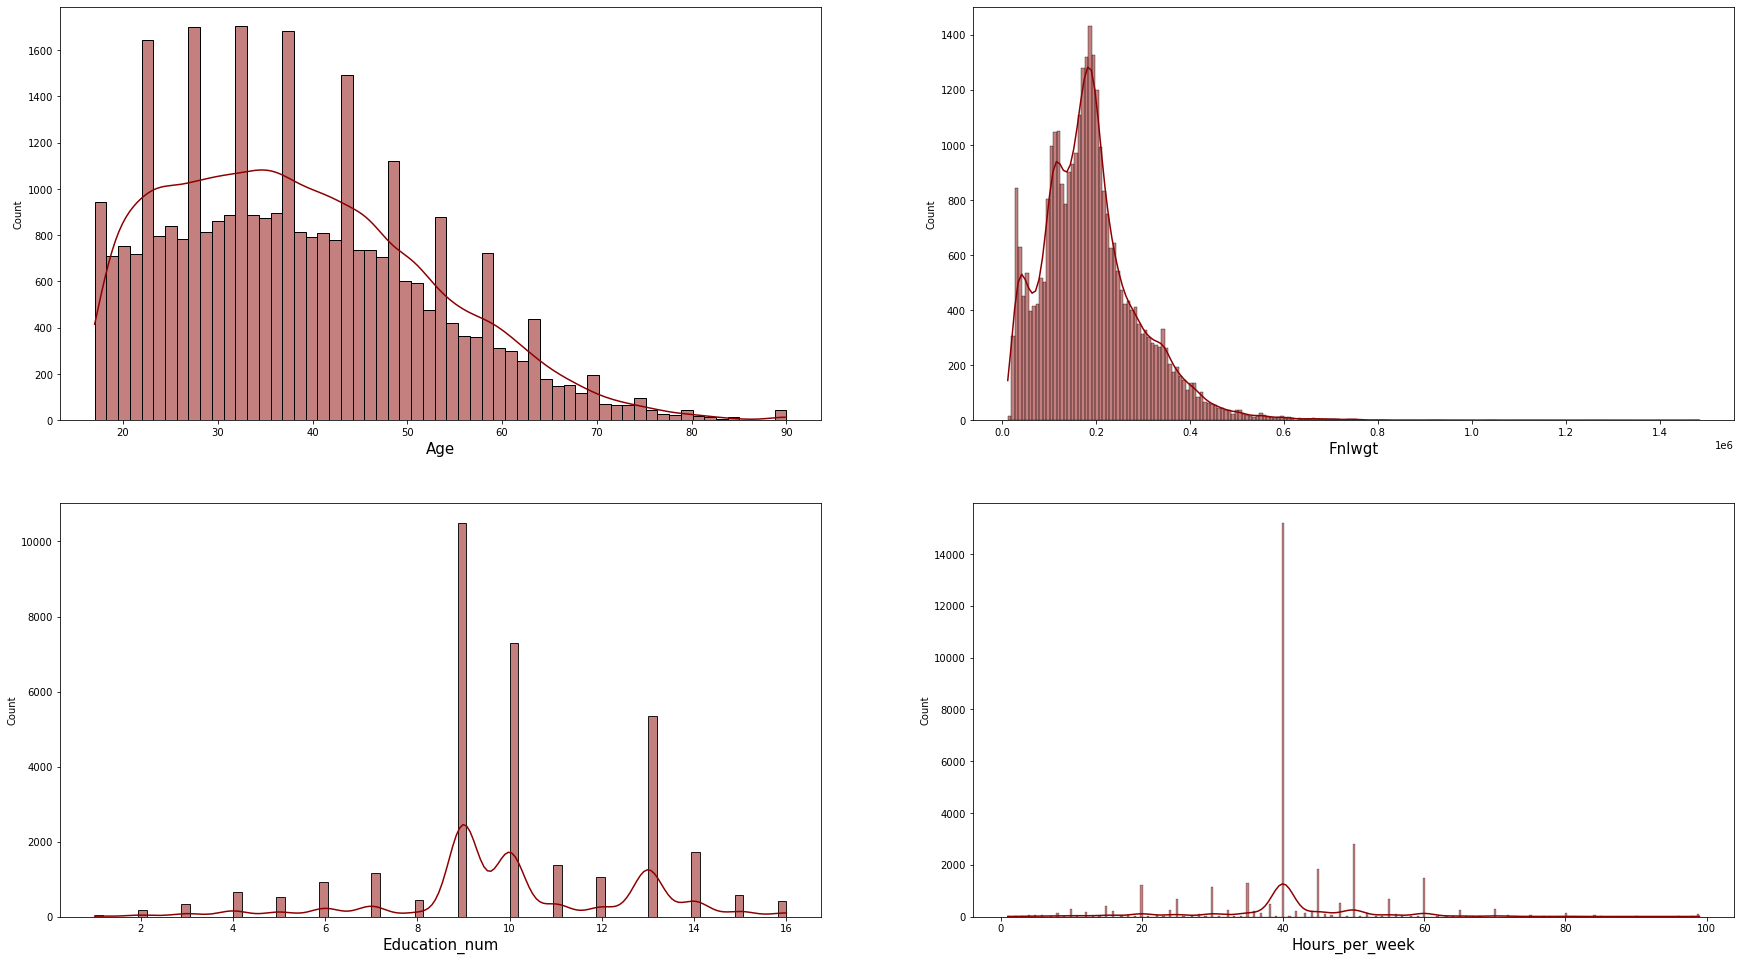

In [19]:
#Q1 What is the distribution of data for numerical columns?

plt.figure(figsize=(30,35), facecolor='white')
plotnumber = 1

for i in df[num_cols]:
    if plotnumber<=24 :
        ax = plt.subplot(4,2,plotnumber)
        sns.histplot(df[i],color='darkred',kde=True,cbar=True)
        plt.xlabel(i,fontsize=15)
       
    plotnumber+=1
plt.show()

* We can see the almost all are skewed.
* We have to analyze Education_num more as there are some distortions
* Hours per week can be binned while further analysing.

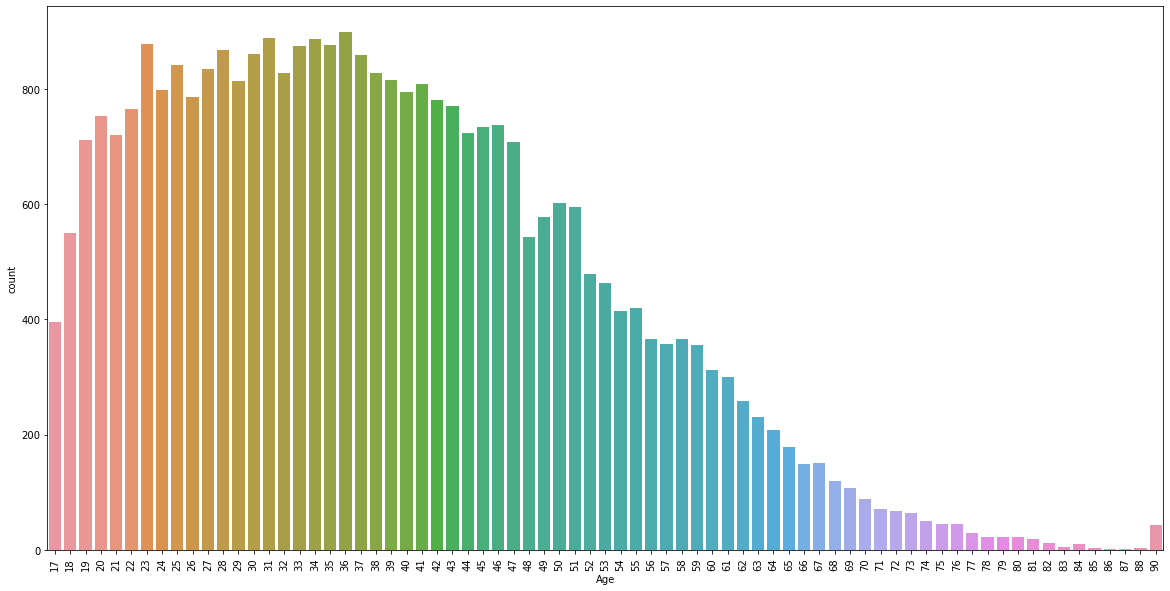

In [20]:
#Q2) What is the Age range of population in the dataset?

plt.figure(figsize=(20,10), facecolor='white')
sns.countplot(x="Age",data=df)
plt.xticks(rotation=90)
plt.show()

* We can see that Adults of Age range 26 to 50 are more in the dataset.
* People of Age 55 and above become lesser and lesser 

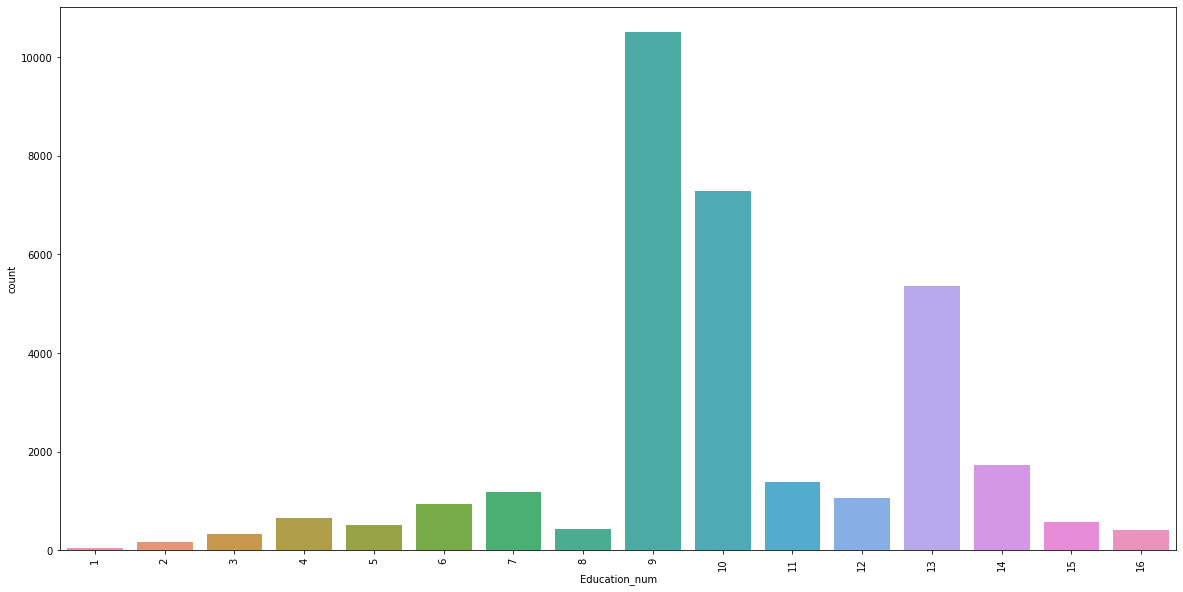

In [21]:
#Q3) What is the Education_num in the dataset?

plt.figure(figsize=(20,10), facecolor='white')
sns.countplot(x="Education_num",data=df)
plt.xticks(rotation=90)
plt.show()

In [22]:
#Q4) Does Education and Education_num has any connection?

education_classes = df['Education'].unique()
for edu_class in education_classes:
    print("For {}, the Education Number is {}"
          .format(edu_class, df[df['Education'] == edu_class]['Education_num'].unique()))

For  Bachelors, the Education Number is [13]
For  HS-grad, the Education Number is [9]
For  11th, the Education Number is [7]
For  Masters, the Education Number is [14]
For  9th, the Education Number is [5]
For  Some-college, the Education Number is [10]
For  Assoc-acdm, the Education Number is [12]
For  Assoc-voc, the Education Number is [11]
For  7th-8th, the Education Number is [4]
For  Doctorate, the Education Number is [16]
For  Prof-school, the Education Number is [15]
For  5th-6th, the Education Number is [3]
For  10th, the Education Number is [6]
For  1st-4th, the Education Number is [2]
For  Preschool, the Education Number is [1]
For  12th, the Education Number is [8]


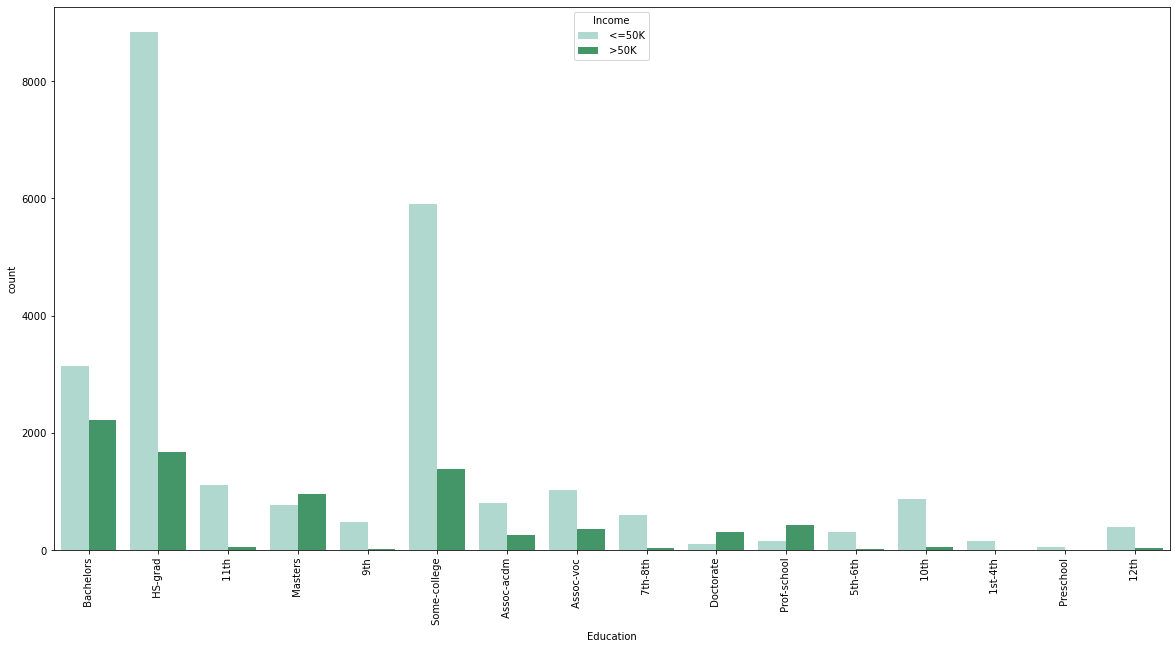

In [23]:
#Q5) Is there any connection between Education and Income

plt.figure(figsize=(20,10), facecolor='white')
sns.countplot(x = 'Education', hue = 'Income', data = df,palette="BuGn")
plt.xticks(rotation=90)
plt.show()

* **We can see that there is no specific purpose for splitting each class from preschool to 12th as it has no difference if combined.**
* I discovered from above plot that Education_num is another number class for Education. 
* I can drop 1 column.
* Instead of giving education of Preshool, 1st-4th,5th-6th,7th-8th,9th,10th,11th,12th We can give as School.


In [24]:
#dropping Education_num

df.drop(['Education_num'], axis = 1, inplace = True)

In [25]:
#replacing preschool to 12th to "School"

df['Education'].replace([' 11th', ' 9th', ' 7th-8th', ' 5th-6th', ' 10th', ' 1st-4th', ' Preschool', ' 12th'],
                             ' School', inplace = True)
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 School           4253
 Masters          1723
 Assoc-voc        1382
 Assoc-acdm       1067
 Prof-school       576
 Doctorate         413
Name: Education, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

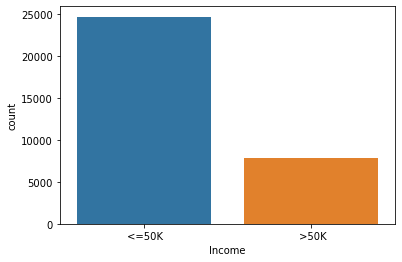

In [26]:
#Q6) What is the count of Target in the dataset?

cat_cols=["Workclass","Education","Marital_status","Occupation","Relationship","Race",
          "Sex","Native_country","Income"]

sns.countplot(df["Income"])

* We can see that there is a major class Imbalance. we have to sort it through SMOTE.
* More population in the dataset has income less than or equal to 50,000
* Approximately, **only One-third of the population earns more than 50,000 USD**
* **Two-third of the population earns less than 50,000USD**.

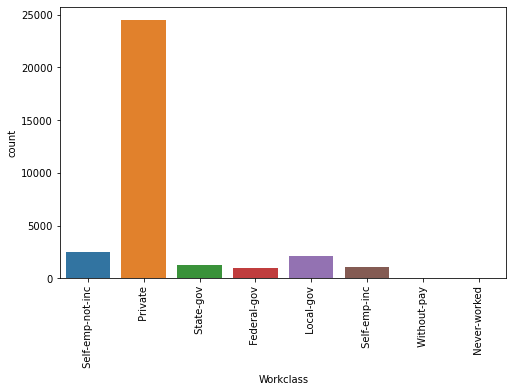

In [32]:
#Q7) What are the workclasses and its count in the Dataset?

plt.figure(figsize=(8,5), facecolor='white')
sns.countplot(x = "Workclass",data=df)
plt.xticks(rotation=90)
plt.show()

* More number of people are in workclass-Private and a very few belong to Without Pay and Never worked.

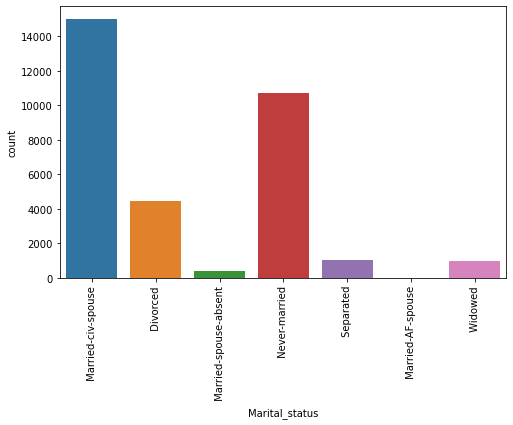

In [33]:
#Q8) What is the Marital status of the population in the Dataset.

plt.figure(figsize=(8,5), facecolor='white')
sns.countplot(x = "Marital_status",data=df)
plt.xticks(rotation=90)
plt.show()

In [35]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

* We have Married Civilian spouse as the most number of population and Married Armed Force Spouse as the least number in the dataset.
* We have single or Never married which is the second most population in the dataset.

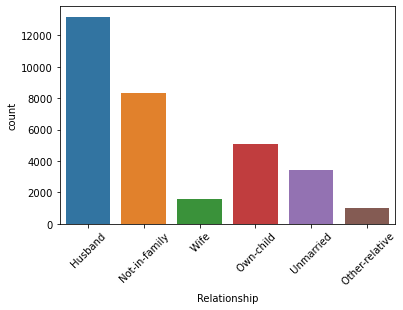

In [36]:
#Q9) What is the Relationship status of the population in the dataset?

sns.countplot(x = "Relationship",data=df)
plt.xticks(rotation=45)
plt.show()

* We have different relationship within the family in the population of the dataset.
* Husband is the most number of population in the dataset.
* The least is other relative.

<AxesSubplot:xlabel='Occupation', ylabel='count'>

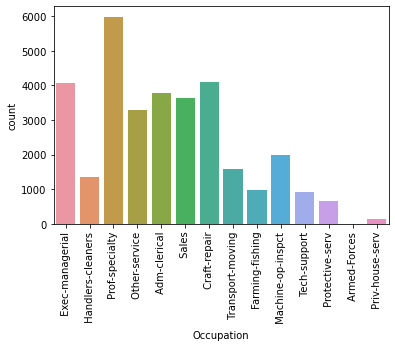

In [38]:
#Q10) What is the count of Occupation of the population in the dataset?

plt.xticks(rotation = 90)
sns.countplot(x = 'Occupation', data = df)

* The most number of population in the dataset is of profession Prof-specialty and the least count is of Armed forces.
* We have different other professions with a good count in the dataset like Exec-managerial, Craft-repair, Admin-clerical, sales, etc.
* We have only few population with professions Protective-services, Tech-support, Farming-fishing.

<AxesSubplot:xlabel='Race', ylabel='count'>

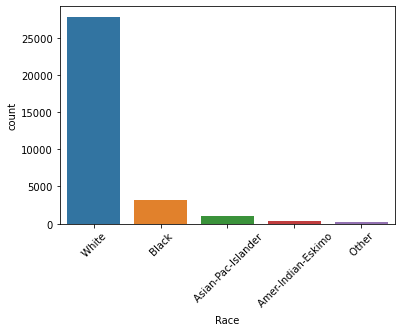

In [40]:
#Q11) What are the diifferent races in the dataset?

plt.xticks(rotation = 45)
sns.countplot(x = 'Race', data = df)

In [41]:
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

We have almost 85% of the population with Race as White and others all belong to 15%

<AxesSubplot:xlabel='Sex', ylabel='count'>

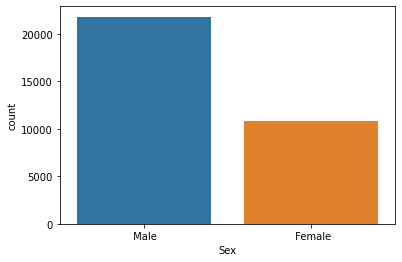

In [43]:
#Q12) What is the count of male and female?

sns.countplot(x = 'Sex', data = df)

In [44]:
df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

65% of the population in the dataset is male and rest are females

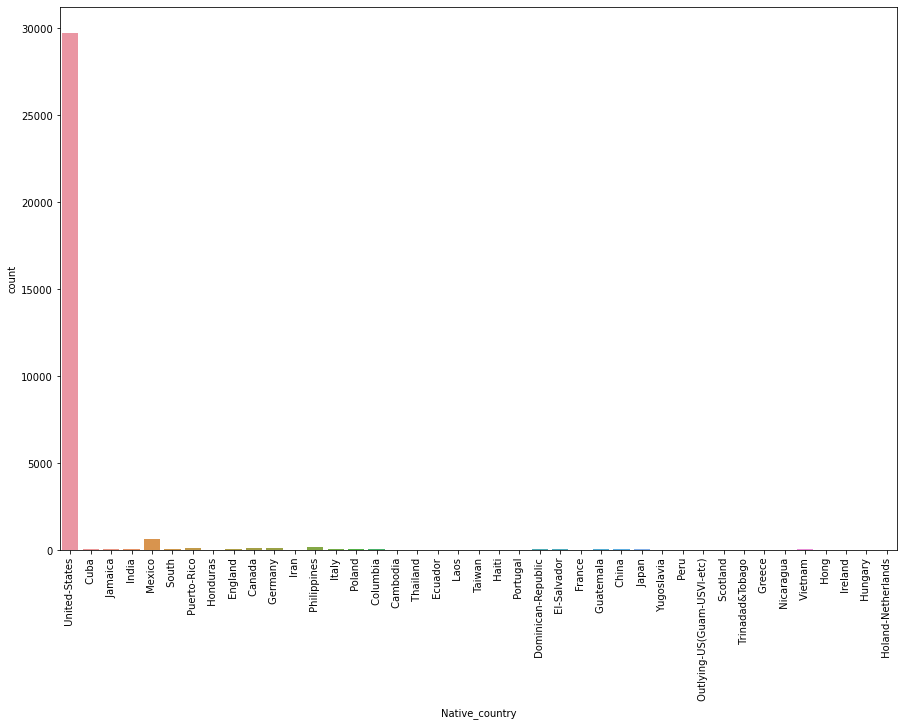

In [46]:
#Q13) What is the Native country status of the population in the dataset?

plt.figure(figsize=(15,10), facecolor='white')
sns.countplot(x = "Native_country",data=df)
plt.xticks(rotation=90)
plt.show()

* We have more of citizens of US than other countries.
* Second comes Mexico and we have other countries which are lesser counts.

### 2.2.2 Bivariate Analysis

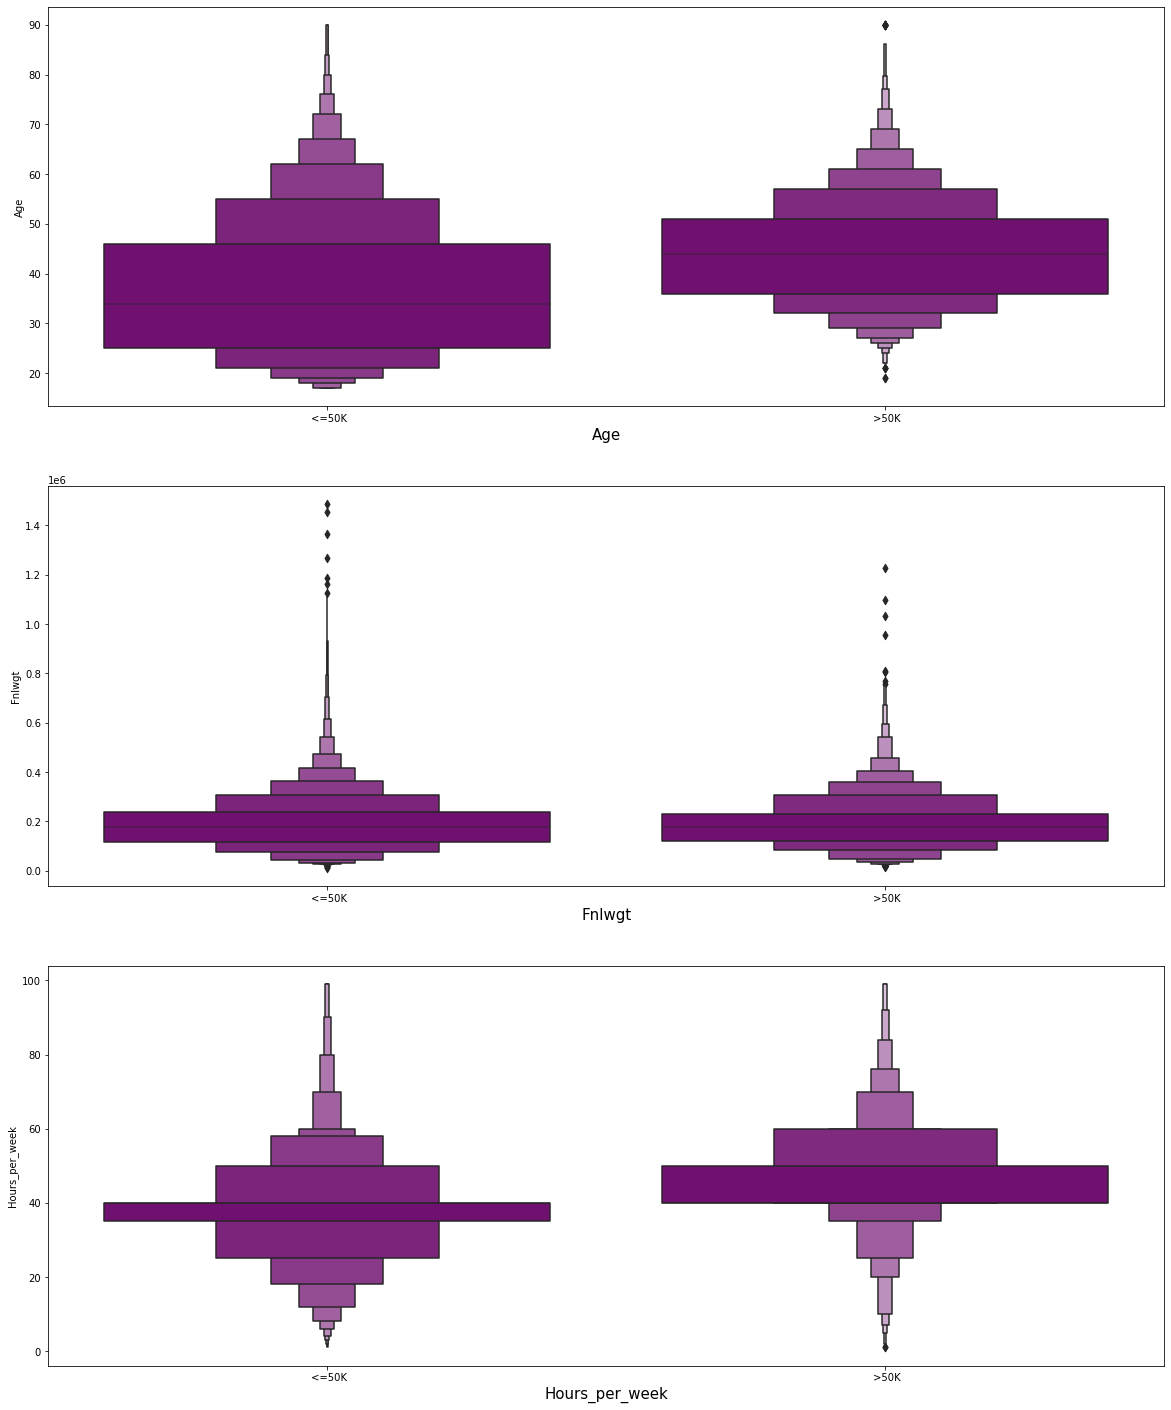

In [49]:
#Q14- What is the relationship between Numerical columns and Target variable?

num_cols=num_cols=["Age","Fnlwgt","Hours_per_week"]

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for i in df[num_cols]:
    if plotnumber<=24 :
        ax = plt.subplot(3,1,plotnumber)
        sns.boxenplot(x=df.Income,y=df[i],color='purple')
        plt.xlabel(i,fontsize=15)
       
    plotnumber+=1
plt.show()

**Observations:**

* **Age**, More number of people whose **income less than 50K belongs to age group 25 to 45**.
* **Age**, More number of people whose **Income is greater than 50k belongs to age group 40 to 55**.
* As quoted from the problem statement regarding **Fnlwgt**, People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.
* **Hours per week**, Most people **who earns less than 50k works for 30 to 40 hours** and **above 50k works for 40 to 50 hours per week**

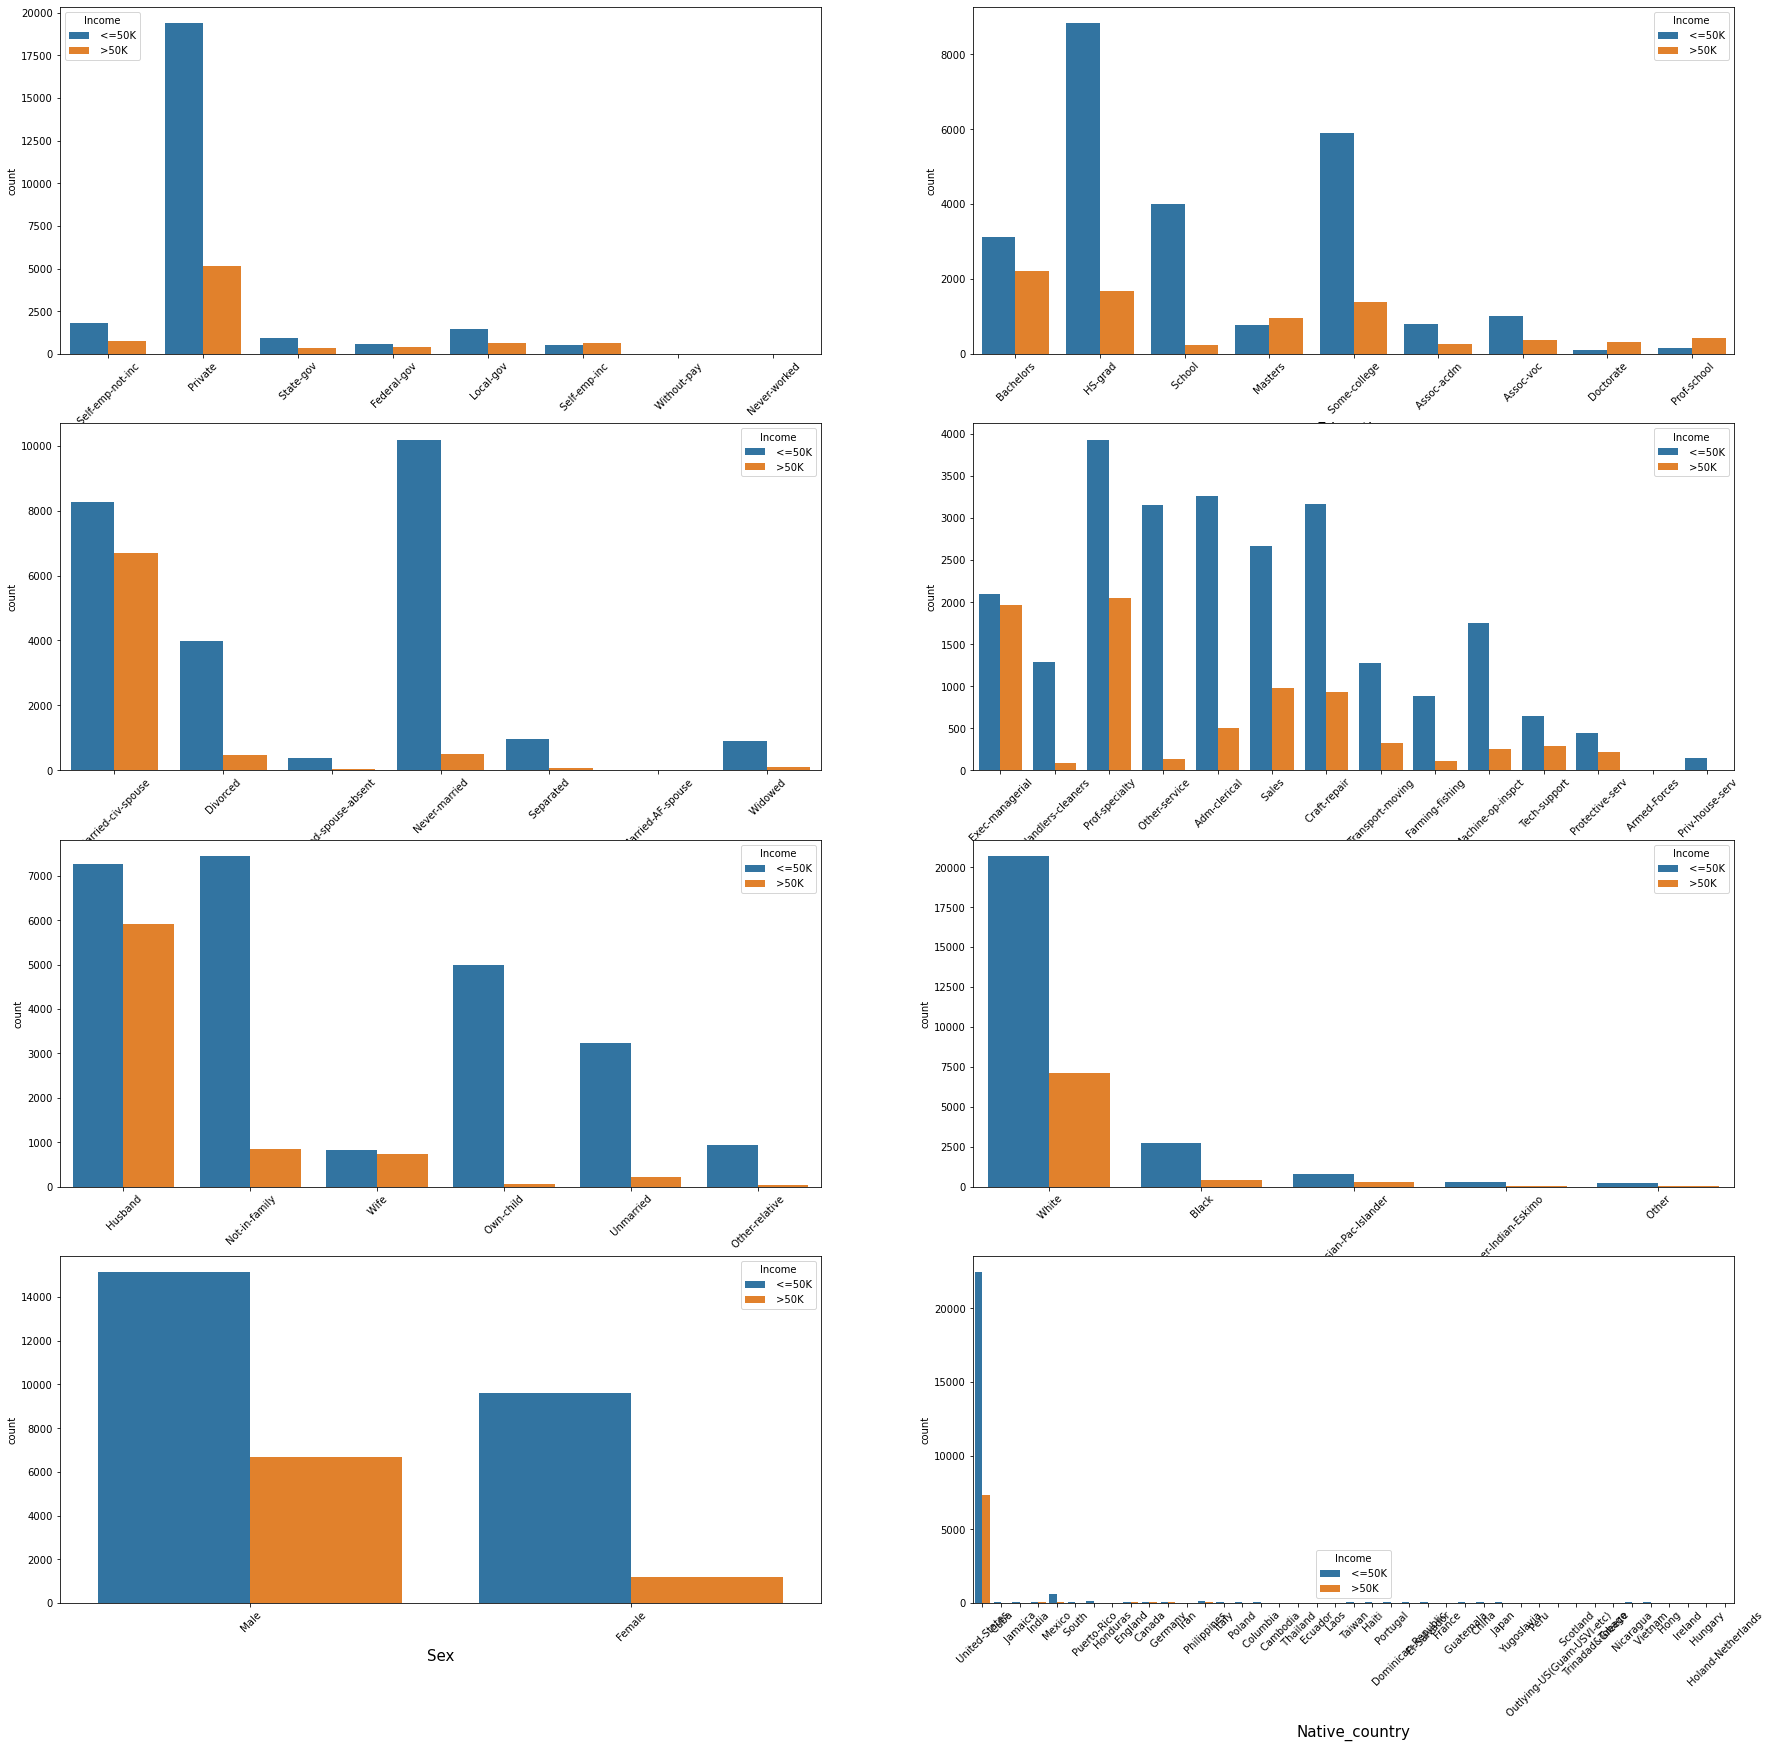

In [80]:
#Q15- What is the relationship between Workclass and Target variable?

cat_cols=["Workclass","Education","Marital_status","Occupation","Relationship",
          "Race","Sex","Native_country"]

plt.figure(figsize=(30,60), facecolor='white')
plotnumber = 1

for i in df[cat_cols]:
    if plotnumber<=24 :
        ax = plt.subplot(8,2,plotnumber)
        sns.countplot(x=df[i],hue=df.Income)
        plt.xlabel(i,fontsize=15)
        plt.xticks(rotation=45)
       
    plotnumber+=1
plt.show()

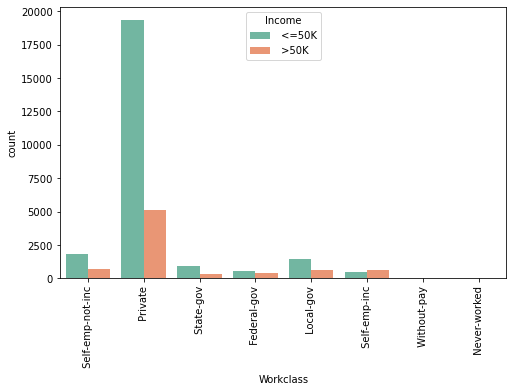

In [66]:
#Q15- What is the relationship between Workclass and Target variable?

plt.figure(figsize=(8,5), facecolor='white')
sns.countplot(x = "Workclass", hue= "Income", data=df,palette='Set2')
plt.xticks(rotation=90);

* Workclass and Income shows that private Workclass is the most number and Income is distributed as usual.

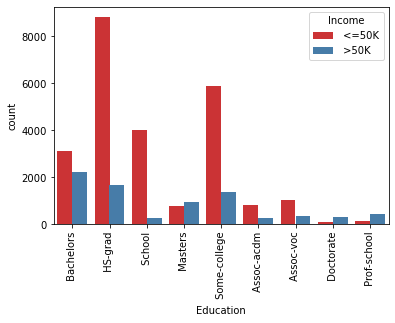

In [67]:
#Q16- What is the relationship between Education and Target variable?

sns.countplot(x = "Education", hue = "Income", data=df,palette='Set1')
plt.xticks(rotation=90);

* We have HS-grad as more number of people.
* Number of people with income greater than 50K is actually more for Bachelors than HS-graduates.
* People who holds a doctrate and Prof-School earn more than 50k and only less people earn less than 50k.

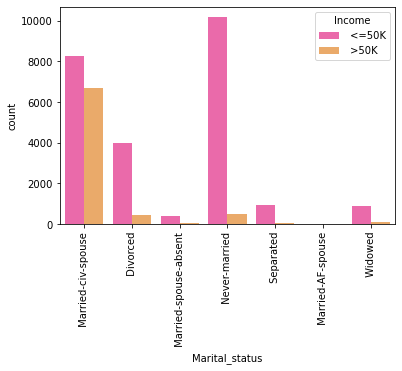

In [68]:
#Q17- What is the relationship between Workclass and Target variable?

sns.countplot(x = "Marital_status", hue = "Income", data=df,palette='spring')
plt.xticks(rotation=90);

* We have Second most number of people in the population as Never-Married but the only less people earn more than 50k.
* We have more number of people in the category Married civilian spouse and income is distributed accordingly.

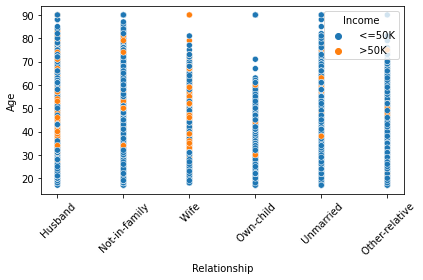

In [90]:
#Q18) Does the Age and Relation have effect on income?

sns.scatterplot(x = "Relationship", y = "Age", hue = "Income",data=df)
plt.xticks(rotation=45)
plt.tight_layout()

* We can see that In all the relationship statuses, when Age is more then Income is tend to be more than 50k.
* We have more people of relationship status as Husband or wife who earns more than 50k
* All other categories tend to have fewer number of more than 50k.
* We can infer from above plot that Age is a major factor related to income.
* This raises m,e to question if marital status and age has any connection?

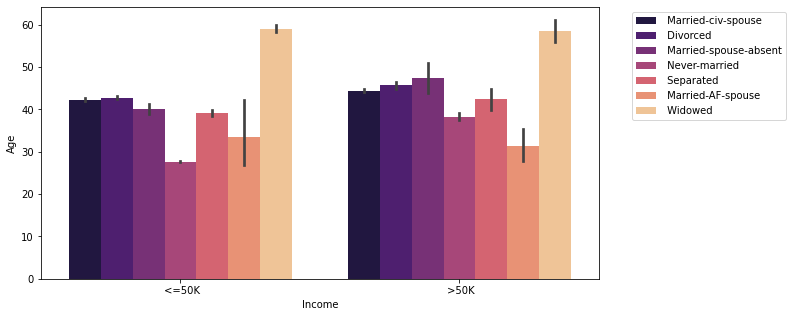

In [113]:
#Q19) Does the Age and marital_status have effect on income?

plt.figure(figsize=(10,5), facecolor='white')
sns.barplot(x='Income',y='Age',hue="Marital_status",data=df,palette='magma')
plt.legend( bbox_to_anchor = (1.05, 1), loc = 'upper left')

* we have more number of people with Marital status as Married-civ-spouse. Hence, Age range of those earning more than 50 ranges between 38 to 52.
* Similarly in all other categories, Age range is always more than 30 to have income of more than 50k except for Armed force spouse.
* **If you are having age more than 30 or if you are a spouse of Armed force, or if you hold a degree of Doctorate or Prof-school you have higher chances of drawing salary more than 50k**
* Married people tend to draw more salary and more than 50k than people who are never married.

<AxesSubplot:xlabel='Income', ylabel='Fnlwgt'>

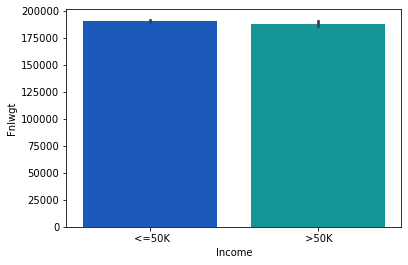

In [116]:
# Checking income with Fnlwgt
sns.barplot(x='Income',y='Fnlwgt',data=df,palette='winter')

With Fnlwgt the chance of getting income >50k and <=50k both are almost equal.

### 2.2.3 Multivariate Analysis

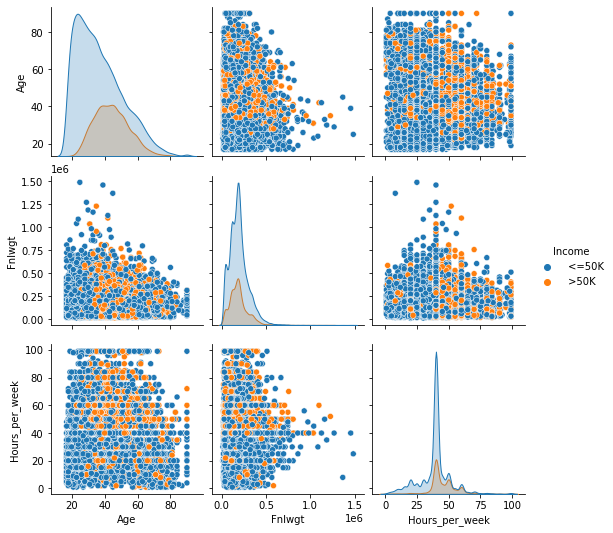

In [117]:
#pair ploting for df
sns.pairplot(df,hue="Income")

Above is my pairplot for the dataset. 

## 3- Data Cleaning and Feature Engineering

### 3.1 Outliers

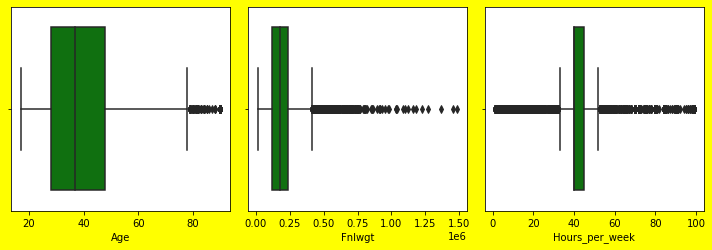

In [119]:
plt.figure(figsize=(10,10),facecolor='yellow')
graph=1 

for column in num_cols:

    plt.subplot(3,3,graph)

    sns.boxplot(df[column],color='green',orient='h')

    plt.xlabel(column,fontsize=10)

    graph+=1

    plt.tight_layout()


#### We can see extreme outliers in all the 3 columns

### Z-Score Method

In [121]:
from scipy.stats import zscore
out_cols=df[["Age","Fnlwgt","Hours_per_week"]]

z=np.abs(zscore(out_cols))
df_new=df[(z<3).all(axis=1)]
df_new

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,School,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [122]:
#checking the old and new datashape

print('old data shape:',df.shape)
print('new data shape:',df_new.shape)

old data shape: (32560, 12)
new data shape: (31668, 12)


In [123]:
#checking the loss percentage

loss_percentage=(((32560-31668)/32560)*100)
loss_percentage

2.7395577395577395

#### Dataloss is 2% only. good to go

### 3.2 Skewness

In [124]:
#checking the skewness

df_new.skew()

Age               0.470790
Fnlwgt            0.634065
Hours_per_week   -0.338625
dtype: float64

We have skewness in Final weight

In [125]:
#Removing the Skewness

skew_cols=["Fnlwgt"]
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df_new[skew_cols] = scaler.fit_transform(df_new[skew_cols].values)

In [126]:
#Checking the skewness again

df_new.skew()

Age               0.470790
Fnlwgt           -0.034511
Hours_per_week   -0.338625
dtype: float64

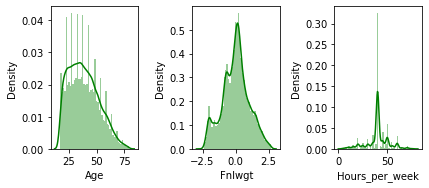

In [127]:
plt.figure(figsize=(10,10))
graph=1 

for column in df_new[num_cols]:

    plt.subplot(4,5,graph)

    sns.distplot(df_new[column],color='green')

    plt.xlabel(column,fontsize=10)

    graph+=1

    plt.tight_layout()

#### Skewness is removed

### 3.3 Encoding

In [129]:
cat_cols=['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']


In [130]:
#Encoding the categorical columns:

from sklearn.preprocessing import LabelEncoder
lencode = {}

for column in cat_cols:
    lencode[column] = LabelEncoder()
    df_new[column] = lencode[column].fit_transform(df_new[column])

In [131]:
#Checking the coded cols:

df_new[cat_cols].head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,5,2,2,3,0,4,1,38,0
1,3,4,0,5,1,4,1,38,0
2,3,7,2,5,0,2,1,38,0
3,3,2,2,9,5,2,0,4,0
4,3,5,2,3,5,4,0,38,0


#### Hence Our dataset is coded.

In [132]:
#Our new dataset:

df_new

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
0,50,5,-1.116442,2,2,3,0,4,1,13,38,0
1,38,3,0.424174,4,0,5,1,4,1,40,38,0
2,53,3,0.604200,7,2,5,0,2,1,40,38,0
3,28,3,1.484065,2,2,9,5,2,0,40,4,0
4,37,3,1.045582,5,2,3,5,4,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,0.808906,0,2,12,5,4,0,38,38,0
32556,40,3,-0.210066,4,2,6,0,4,1,40,38,1
32557,58,3,-0.237780,4,6,0,4,4,0,40,38,0
32558,22,3,0.285834,4,4,0,3,4,1,20,38,0


#### Outliers removed, skewness removed and encoded the categorical data. Our data is clean for the next step.

### 3.4 Correlation

In [133]:
#Checking the correlation of variables

df_new.corr()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country,Income
Age,1.000000,0.037913,-0.066120,-0.068935,-0.284720,-0.000097,-0.267398,0.028030,0.091202,0.094692,-0.002536,0.245469
Workclass,0.037913,1.000000,-0.021895,0.012019,-0.020655,0.007560,-0.056891,0.046380,0.070090,0.030264,-0.001053,0.003709
Fnlwgt,-0.066120,-0.021895,1.000000,0.012084,0.027842,0.001563,0.006906,-0.006929,0.027057,-0.014988,-0.066123,-0.006181
Education,-0.068935,0.012019,0.012084,1.000000,0.062777,-0.018508,0.077881,-0.018542,-0.028944,-0.127796,-0.027629,-0.145721
Marital_status,-0.284720,-0.020655,0.027842,0.062777,1.000000,0.034326,0.186441,-0.067683,-0.128605,-0.197663,-0.020703,-0.198673
Occupation,-0.000097,0.007560,0.001563,-0.018508,0.034326,1.000000,-0.037317,-0.004149,0.046912,-0.020597,-0.002680,0.034201
Relationship,-0.267398,-0.056891,0.006906,0.077881,0.186441,-0.037317,1.000000,-0.115443,-0.582647,-0.262153,-0.010260,-0.250451
Race,0.028030,0.046380,-0.006929,-0.018542,-0.067683,-0.004149,-0.115443,1.000000,0.088941,0.045630,0.120275,0.072652
Sex,0.091202,0.070090,0.027057,-0.028944,-0.128605,0.046912,-0.582647,0.088941,1.000000,0.239183,0.002080,0.215588
Hours_per_week,0.094692,0.030264,-0.014988,-0.127796,-0.197663,-0.020597,-0.262153,0.045630,0.239183,1.000000,0.004510,0.242344


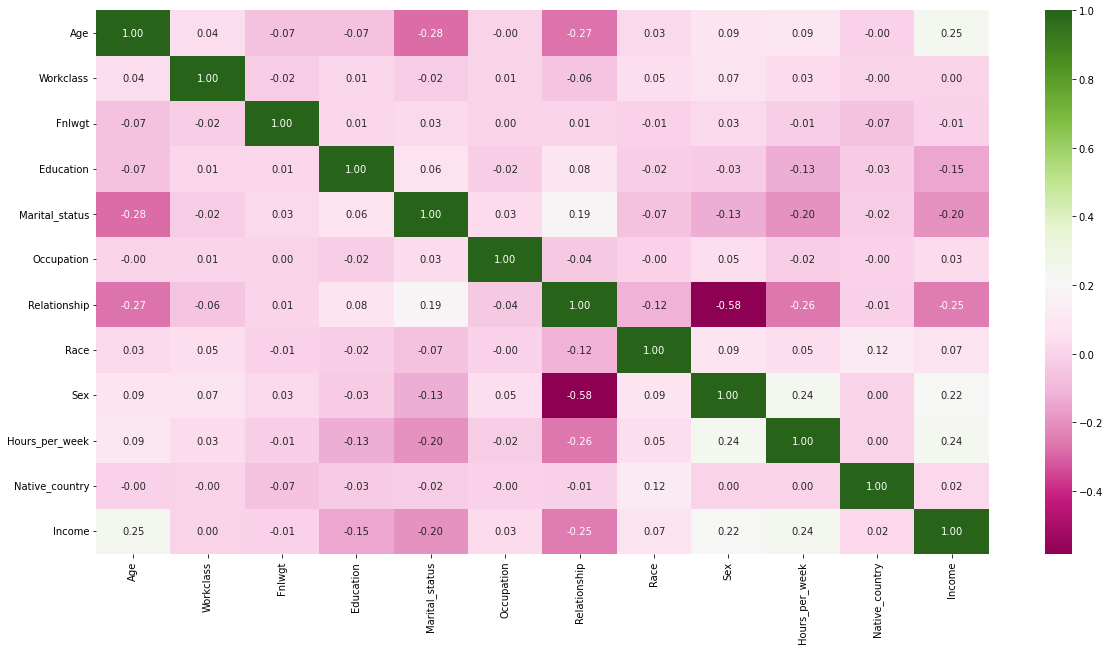

In [136]:
#Correlation Heat map

corr = df_new.corr()
plt.figure(figsize=(20,10), facecolor='white')
sns.heatmap(corr, annot=True,cmap='PiYG',fmt='.2f')
plt.show()

* There is no Multicollinearity
* Workclass and Fnlwgt has correlation almost 0.
* The most correlated factors among the variables are Age, Relationship, Hours per week and Sex.

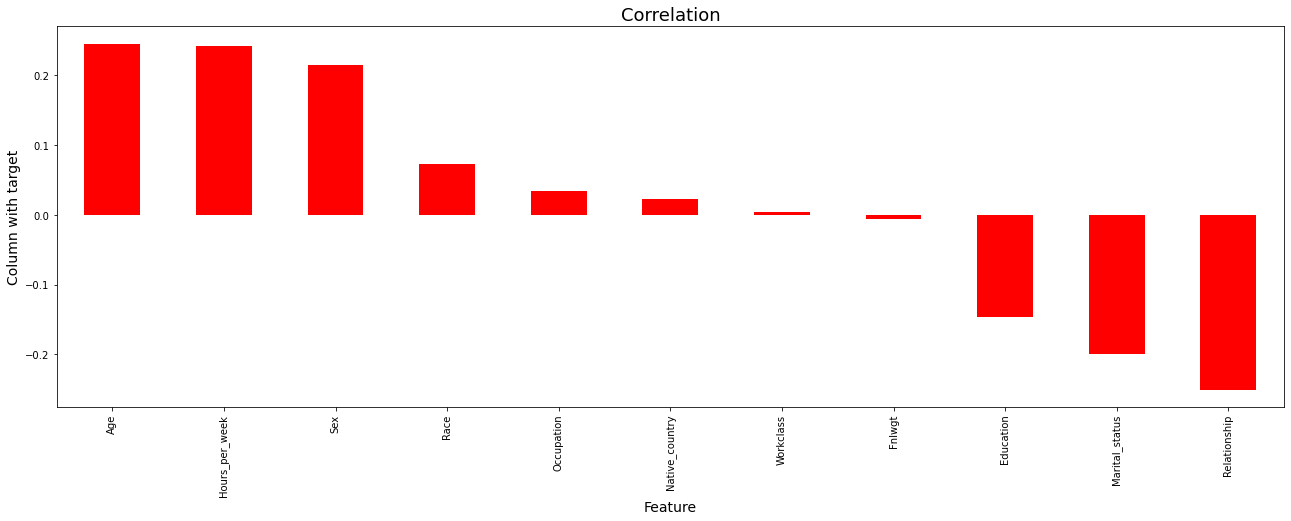

In [139]:
#Visualization of correlation:

plt.figure(figsize=(22,7))
df_new.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='bar',color='red')
plt.xlabel('Feature',fontsize=14)
plt.ylabel("Column with target",fontsize=14)
plt.title("Correlation",fontsize=18)
plt.show()

As we have inferred from the bivariate analysis, Age, Relationship, Hours per week and Education determine the Income of the group.

In [140]:
#Dropping the Workclass as its correlation is 0

df_new = df_new.drop(["Workclass"],axis=1)

### 3.5 Data Preprocessing

In [141]:
#splitting data to x and y
x = df_new.drop("Income",axis=1)
y = df_new["Income"]

In [142]:
x.shape

(31668, 10)

In [143]:
y.shape

(31668,)

In [144]:
y.value_counts()

0    24055
1     7613
Name: Income, dtype: int64

#### We have Imbalanced data. Using Smote to Balance the data

### 3.6 SMOTE Technique

In [145]:
#Importing SMOTE and using it to balance

from imblearn.over_sampling import SMOTE

smt = SMOTE()
x,y = smt.fit_resample(x,y)

0    24055
1    24055
Name: Income, dtype: int64


<AxesSubplot:xlabel='Income', ylabel='count'>

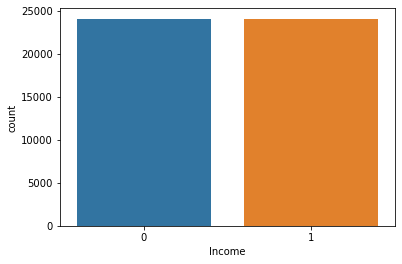

In [146]:
#Checking the count of Attrition

print(y.value_counts())
sns.countplot(y)

Hence we have balanced the data

### 3.7 Standardization

In [147]:
from sklearn.preprocessing import StandardScaler

ssc=StandardScaler()

x= pd.DataFrame(ssc.fit_transform(x), columns=x.columns)

In [148]:
x.head()

,Age,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Hours_per_week,Native_country
0,0.766618,-1.181679,-1.030903,-0.306755,-0.796398,-0.718490,0.366953,0.622459,-2.629428,0.251590
1,-0.181148,0.453087,-0.200908,-1.833468,-0.289868,-0.102791,0.366953,0.622459,-0.152826,0.251590
2,1.003559,0.644116,1.044084,-0.306755,-0.289868,-0.718490,-2.152905,0.622459,-0.152826,0.251590
3,-0.970953,1.577751,-1.030903,-0.306755,0.723193,2.360002,-2.152905,-1.606532,-0.152826,-5.411183
4,-0.260128,1.112471,0.214089,-0.306755,-0.796398,2.360002,0.366953,-1.606532,-0.152826,0.251590


### 3.8 VIF Factor/ Multicollinearity

In [149]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [150]:
vif_calc()

   VIF Factor        features
0    1.159091             Age
1    1.008860          Fnlwgt
2    1.023050       Education
3    1.137773  Marital_status
4    1.004695      Occupation
5    1.947460    Relationship
6    1.042830            Race
7    1.797026             Sex
8    1.141841  Hours_per_week
9    1.030220  Native_country


No Multicollinearity as we have predicted earlier.

#### Our data is cleaned and standardized and we can move on to building the model

## 4- Model Building

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score, confusion_matrix, \
precision_score, f1_score, accuracy_score, classification_report

### a) Logistic Regression

In [153]:
#Finding the Best Random State

Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.7207094852075105  on Random_state  78


In [154]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =RS)

In [155]:
lr=LogisticRegression()

lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred_lr=lr.predict(x_test)
print('Accuracy score of Logistic Regression is:')
print(accuracy_score(y_test,pred_lr))
print(confusion_matrix(y_test,pred_lr))
print(classification_report(y_test,pred_lr))

Accuracy score of Logistic Regression is:
0.7207094852075105
[[4886 2390]
 [1641 5516]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71      7276
           1       0.70      0.77      0.73      7157

    accuracy                           0.72     14433
   macro avg       0.72      0.72      0.72     14433
weighted avg       0.72      0.72      0.72     14433



In [156]:
#HyperParameter Tuning of LR

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=RS)

lr_grid_param={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'penalty':['none', 'elasticnet', 'l1', 'l2'],
               'C':[0.001, 0.01, 0.1, 1, 10, 100]}

gd_sr=GridSearchCV(estimator=lr,param_grid=lr_grid_param,scoring='accuracy',cv=5,verbose=0)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)

print(gd_sr.best_score_)

{'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}
0.7162128455622532


In [159]:
#Reinstating the tuned parameters:


lr=LogisticRegression(C=0.001,solver='saga',penalty='l1')

lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print('Accuracy score of Logistic Regression is:')
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy score of Logistic Regression is:
0.7214023418554701
[[4753 2523]
 [1498 5659]]
              precision    recall  f1-score   support

           0       0.76      0.65      0.70      7276
           1       0.69      0.79      0.74      7157

    accuracy                           0.72     14433
   macro avg       0.73      0.72      0.72     14433
weighted avg       0.73      0.72      0.72     14433



Score is improved a little bit only. Our Precision rate is not good for positive rate. We have a recall rate of 79% which is pretty good. We have f1 score 0.74

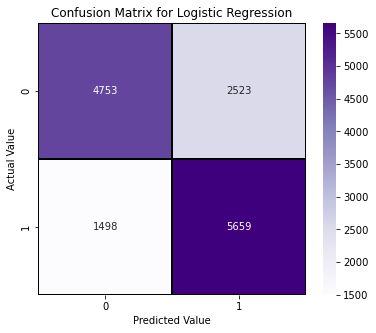

In [161]:
#Plotting the confusion Matrix,took predicted values from model without hyperparameter tuning

cm = confusion_matrix(y_test, predlr)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(6,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

We have true negative of 4753 and true positive of 5659. But our false positives are a little bit higher.

### b)Decision Tree Classifier

In [162]:
#Finding the best Randomstate:

Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    dt = DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    pred = dt.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.8149379893300076  on Random_state  52


In [163]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =RS)

In [164]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
pred_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,pred_dtc))
print(confusion_matrix(y_test,pred_dtc))
print(classification_report(y_test,pred_dtc))

0.8141758470172521
[[5818 1435]
 [1247 5933]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      7253
           1       0.81      0.83      0.82      7180

    accuracy                           0.81     14433
   macro avg       0.81      0.81      0.81     14433
weighted avg       0.81      0.81      0.81     14433



In [165]:
#HyperParameter Tuning for DTC

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=RS)

dtc= DecisionTreeClassifier()
dt_grid_param={'criterion':['gini','entropy'],
             'max_depth':np.arange(0,50),
             'max_features':["auto","sqrt","log2"],
             'max_leaf_nodes':[10,20,30],'min_samples_leaf': [5, 10, 20, 50, 100]}

gd_sr=GridSearchCV(estimator=dtc,param_grid=dt_grid_param,scoring='accuracy',cv=5,verbose=0)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(gd_sr)
print(gd_sr.best_score_)
print(gd_sr.best_estimator_)
print(gd_sr.best_params_)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy')
0.8044481396799001
DecisionTreeClassifier(max_depth=36, max_features='auto', max_leaf_nodes=30,
                       min_samples_leaf=5)
{'criterion': 'gini', 'max_depth': 36, 'max_features': 'auto', 'max_leaf_nodes': 30, 'min_samples_leaf': 5}


In [192]:
#Reinstating the tuned parameters:

dtc=DecisionTreeClassifier(criterion='gini',max_depth=36,max_features='auto',
                           max_leaf_nodes=30, min_samples_leaf=5)
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8019815700131643
[[5340 1913]
 [ 945 6235]]
              precision    recall  f1-score   support

           0       0.85      0.74      0.79      7253
           1       0.77      0.87      0.81      7180

    accuracy                           0.80     14433
   macro avg       0.81      0.80      0.80     14433
weighted avg       0.81      0.80      0.80     14433



#### Our score is not improved

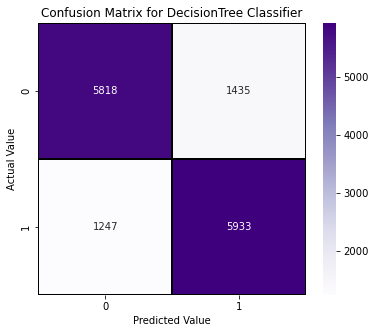

In [193]:
#Plotting the confusion Matrix,took predicted values from model without hyperparameter tuning

cm = confusion_matrix(y_test, pred_dtc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(6,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix for DecisionTree Classifier')
plt.show()

We have almost 24% rate of False Positives

### c) Support Vector Classifier

In [197]:
#Calling each kernel by defining svmkernel:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =42)

def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))

In [198]:
svmkernel('linear')

0.7131573477447516
[[4301 2974]
 [1166 5992]]
              precision    recall  f1-score   support

           0       0.79      0.59      0.68      7275
           1       0.67      0.84      0.74      7158

    accuracy                           0.71     14433
   macro avg       0.73      0.71      0.71     14433
weighted avg       0.73      0.71      0.71     14433



In [199]:
svmkernel('poly')

0.7362987597866002
[[4062 3213]
 [ 593 6565]]
              precision    recall  f1-score   support

           0       0.87      0.56      0.68      7275
           1       0.67      0.92      0.78      7158

    accuracy                           0.74     14433
   macro avg       0.77      0.74      0.73     14433
weighted avg       0.77      0.74      0.73     14433



In [200]:
svmkernel('rbf')

0.8037137116330632
[[5227 2048]
 [ 785 6373]]
              precision    recall  f1-score   support

           0       0.87      0.72      0.79      7275
           1       0.76      0.89      0.82      7158

    accuracy                           0.80     14433
   macro avg       0.81      0.80      0.80     14433
weighted avg       0.81      0.80      0.80     14433



#### The hyper parameter tuning for SVC is taking more than 3 hours. so not taking it

In [203]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
pred_svc=svc.predict(x_test)
print(accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

0.8080094228504122
[[5175 1985]
 [ 786 6487]]
              precision    recall  f1-score   support

           0       0.87      0.72      0.79      7160
           1       0.77      0.89      0.82      7273

    accuracy                           0.81     14433
   macro avg       0.82      0.81      0.81     14433
weighted avg       0.82      0.81      0.81     14433



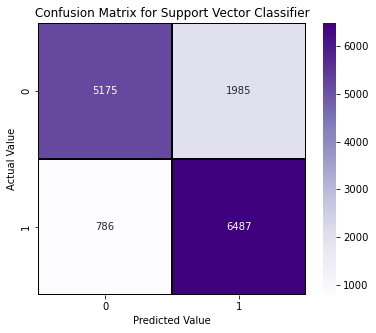

In [206]:
#Plotting the confusion Matrix

cm = confusion_matrix(y_test, pred_svc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(6,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix for Support Vector Classifier')
plt.show()

Our False Negative is preety low and thats good. Comparing to other 2 models, this is a better one.

### d) Random Forest Classifier

In [207]:
#Finding the best random state

Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    rf=RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.8693965218596272  on Random_state  40


In [208]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =RS)

In [209]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8692579505300353
[[6088 1121]
 [ 766 6458]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.87      7209
           1       0.85      0.89      0.87      7224

    accuracy                           0.87     14433
   macro avg       0.87      0.87      0.87     14433
weighted avg       0.87      0.87      0.87     14433



In [210]:
#Hyper Parameter Tuning for Random Forest

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=RS)

rf=RandomForestClassifier()
rf_grid_param={"max_features": [1,3,10],
                "min_samples_split":[2,3,5,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[200,300],
                "criterion":["gini",'entropy']}

gd_sr=GridSearchCV(estimator=rf,param_grid=rf_grid_param,scoring='accuracy',cv=5)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)

print(gd_sr.best_score_)

{'bootstrap': False, 'criterion': 'gini', 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
0.867927665765953


In [223]:
#Reinstating the tuned parameters:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =40)
rf=RandomForestClassifier(n_estimators=300,bootstrap=False,criterion='gini',
                         max_features=3,min_samples_leaf=1,min_samples_split=5)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8716136631330977
[[6165 1044]
 [ 809 6415]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      7209
           1       0.86      0.89      0.87      7224

    accuracy                           0.87     14433
   macro avg       0.87      0.87      0.87     14433
weighted avg       0.87      0.87      0.87     14433



Our Score has increased by 1%

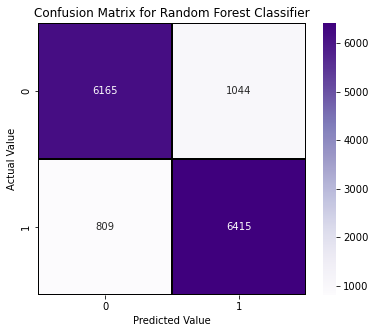

In [224]:
#Plotting the confusion Matrix

cm = confusion_matrix(y_test, predrf)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(6,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

This confusion matrix is much better than all the other models like dtc, svc and lr. It has comparitively lower false positive and lower negative rate.

### e) KNN Classifier

In [213]:
#Finding the best random state:

Accu=0
RS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    knn=KNeighborsClassifier()
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.8296958359315457  on Random_state  9


In [214]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =RS)

In [215]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8296958359315457
[[5564 1592]
 [ 866 6411]]
              precision    recall  f1-score   support

           0       0.87      0.78      0.82      7156
           1       0.80      0.88      0.84      7277

    accuracy                           0.83     14433
   macro avg       0.83      0.83      0.83     14433
weighted avg       0.83      0.83      0.83     14433



In [225]:
#HyperParameter Tuning of knn:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=RS)

knn=KNeighborsClassifier()
knn_grid_param={"n_neighbors": np.arange(1, 25, 2),
                "weights": ["uniform","distance"],
                'metric' : ['minkowski','euclidean','manhattan'],
                'algorithm':['auto','ball_tree','kd_tree','brute']}

gd_sr=GridSearchCV(estimator=knn,param_grid=knn_grid_param,scoring='accuracy',cv=5)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)

print(gd_sr.best_score_)

{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
0.8462689669507378


In [226]:
#Reinstating the tuned parameters

knn=KNeighborsClassifier(n_neighbors=5,metric='manhattan',weights='distance',algorithm='auto')
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8502043927111481
[[5689 1467]
 [ 695 6582]]
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      7156
           1       0.82      0.90      0.86      7277

    accuracy                           0.85     14433
   macro avg       0.85      0.85      0.85     14433
weighted avg       0.85      0.85      0.85     14433



Our score has increased

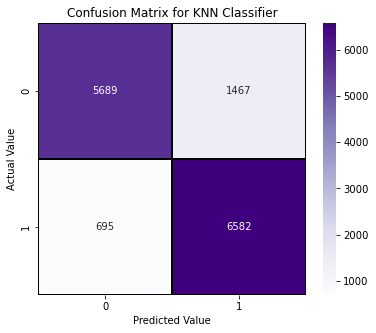

In [228]:
#Plotting the confusion Matrix

cm = confusion_matrix(y_test, predknn)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(6,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

### f) Gradient Boosting Classifier

In [232]:
from sklearn.ensemble import GradientBoostingClassifier

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =None)

GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
predgb=GBC.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, predgb))
print('Confusion Matrix:',confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))

Accuracy Score: 0.8246379824014411
Confusion Matrix: [[5622 1537]
 [ 994 6280]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      7159
           1       0.80      0.86      0.83      7274

    accuracy                           0.82     14433
   macro avg       0.83      0.82      0.82     14433
weighted avg       0.83      0.82      0.82     14433



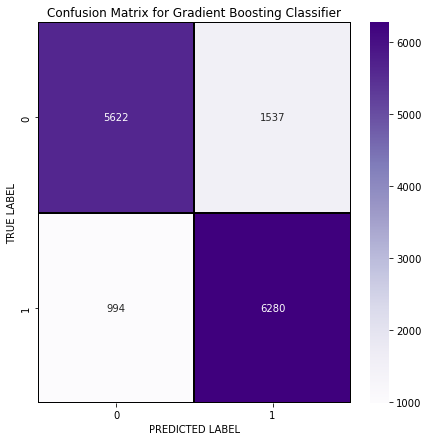

In [233]:
cm = confusion_matrix(y_test, predgb)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]


f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

### Cross Validation Score

In [234]:
score=cross_val_score(lr,x,y,cv=5)
score_a=score.mean()
print("Cross_Val_Score of LR:",score_a)

Cross_Val_Score of LR: 0.7161920598628144


In [235]:
score=cross_val_score(dtc,x,y,cv=5)
score_b=score.mean()
print("Cross_Val_Score of DTC:",score_b)

Cross_Val_Score of DTC: 0.7860943670754522


In [236]:
score=cross_val_score(svc,x,y,cv=5)
score_c=score.mean()
print("Cross_Val_Score of SVC:",score_c)

Cross_Val_Score of SVC: 0.8041987112866348


In [237]:
score=cross_val_score(rf,x,y,cv=5)
score_d=score.mean()
print("Cross_Val_Score of RF:",score_d)

Cross_Val_Score of RF: 0.8676574516732488


In [238]:
score=cross_val_score(knn,x,y,cv=5)
score_e=score.mean()
print("Cross_Val_Score of KNN:",score_e)

Cross_Val_Score of KNN: 0.8462689669507378


In [239]:
score=cross_val_score(GBC,x,y,cv=5)
score_f=score.mean()
print("Cross_Val_Score of Gradient Boosting:",score_f)

Cross_Val_Score of Gradient Boosting: 0.8263978382872583


Text(0.5, 1.0, 'Cross Validation Scores')

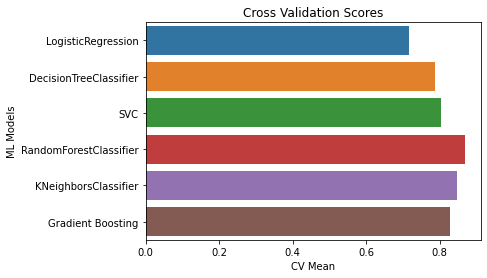

In [240]:
cv_result=[score_a,score_b,score_c,score_d,score_e,score_f]
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":[ "LogisticRegression",
            "DecisionTreeClassifier", "SVC","RandomForestClassifier","KNeighborsClassifier",
            "Gradient Boosting"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("CV Mean")
g.set_title("Cross Validation Scores")

Text(0.5, 1.0, 'Accuracy scores of different Models')

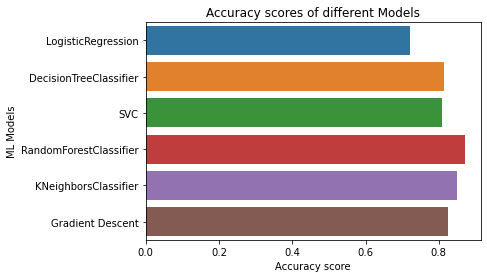

In [242]:
score_lr=0.7214023418554701
score_dtc=0.8141758470172521
score_svc=0.8080094228504122
score_rf=0.8708515208203422
score_knn=0.8502043927111481
score_gbc=0.8246379824014411

acc_result=[score_lr,score_dtc,score_svc,score_rf,score_knn,score_gbc]
acc_results = pd.DataFrame({"Accuracy Scores":acc_result, "ML Models":[ "LogisticRegression",
            "DecisionTreeClassifier", "SVC","RandomForestClassifier","KNeighborsClassifier",
            "Gradient Descent"]})

g = sns.barplot("Accuracy Scores", "ML Models", data = acc_results)
g.set_xlabel("Accuracy score")
g.set_title("Accuracy scores of different Models")

## Cross_Val_Score of Random forest is the highest and are almost equal to the Accuracy Score

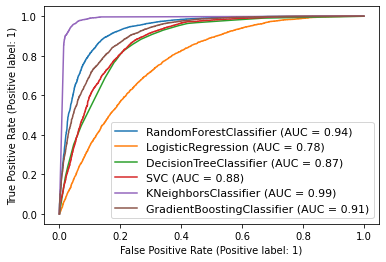

In [266]:
# Plotting for all the models used here 

from sklearn.metrics import plot_roc_curve 

disp = plot_roc_curve(rf,x_test,y_test)
plot_roc_curve(lr, x_test, y_test, ax=disp.ax_)    
plot_roc_curve(dtc,x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax=disp.ax_)
plot_roc_curve(knn, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GBC, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

# From above 3 plots, we can derive that Best Model is Random Forest as per Accuracy Score and CV Score but KNN is the best when AUC_ROC is considered. Lets take 2 Final_models and check the actual vs predicted values.

In [247]:
#Final model as Random Forest
#'bootstrap': False, 'criterion': 'gini', 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =40)
Final_Model=RandomForestClassifier(n_estimators=300,bootstrap=False,criterion='gini',
                         max_features=3,min_samples_leaf=1,min_samples_split=5)
Final_Model.fit(x_train,y_train)
predrf=Final_Model.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8701586641723827
[[6150 1059]
 [ 815 6409]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87      7209
           1       0.86      0.89      0.87      7224

    accuracy                           0.87     14433
   macro avg       0.87      0.87      0.87     14433
weighted avg       0.87      0.87      0.87     14433



### AUC-ROC Curve

In [248]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [249]:
y_pred_prob=Final_Model.predict_proba(x_test)[:,1]

In [250]:
y_pred_prob

array([0.01611111, 0.17444444, 0.99055556, ..., 0.03972222, 0.11611111,
       0.96722222])

In [251]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [252]:
fpr

array([0.00000000e+00, 5.54861978e-04, 9.71008462e-04, ...,
       8.54348731e-01, 8.63226522e-01, 1.00000000e+00])

In [253]:
tpr

array([0.        , 0.03516058, 0.04831118, ..., 1.        , 1.        ,
       1.        ])

In [254]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 9.99166667e-01, ...,
       1.11111111e-03, 8.33333333e-04, 0.00000000e+00])

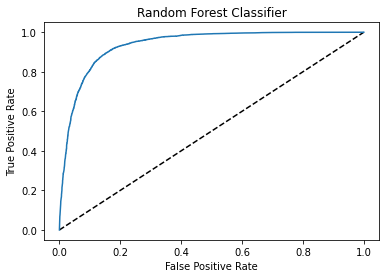

In [268]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

In [269]:
auc_score=roc_auc_score(y_test,Final_Model.predict(x_test))
print((auc_score)*100)

87.0140954067659


#### We have Auc-Roc of 87% for our final model as Random Forest

## Saving the Model

In [258]:
import joblib
joblib.dump(Final_Model,'Census_Income_rf.pkl')

['Census_Income_rf.pkl']

<AxesSubplot:>

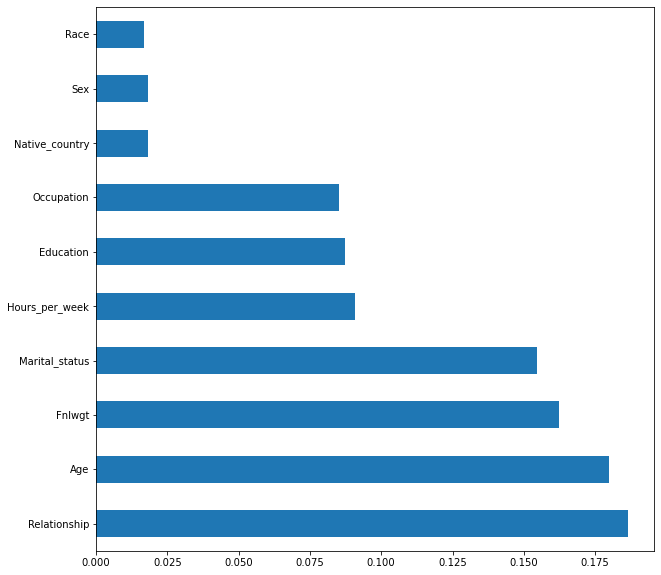

In [261]:
#Checking Feature Importance with Random Forest Model

feat_importances = pd.Series(Final_Model.feature_importances_, index=x.columns)
feat_importances.nlargest(100).plot(kind='barh',figsize=(10,10))

#### According to our final Model, Relationship, Age, FnlWgt and Marital Status are the important features determining the Income

## Predictions

In [262]:
# Loading the saved model
model=joblib.load("Census_Income_rf.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([0, 0, 1, ..., 0, 0, 1])

In [263]:
base = pd.DataFrame()
base["actual"] = y_test
base["predictions"] = prediction

In [264]:
base

,actual,predictions
5414,0,0
10817,0,0
33892,1,1
22911,0,0
40440,1,1
...,...,...
3400,1,0
44258,1,0
14353,0,0
25144,0,0


### We have almost equal predicted value to actual value.

In [271]:
base['difference']=base['actual']-base['predictions']
base

,actual,predictions,difference
5414,0,0,0
10817,0,0,0
33892,1,1,0
22911,0,0,0
40440,1,1,0
...,...,...,...
3400,1,0,1
44258,1,0,1
14353,0,0,0
25144,0,0,0


In [272]:
print(base['difference'].value_counts())

 0    12559
-1     1059
 1      815
Name: difference, dtype: int64


* **We have 12559 correct values and 1874 wrong prediction.**
* **14.9% of incorrect values**

## Lets take Knn as Final Model and check predicted values

In [275]:
#Reinstating the tuned parameters for KNN

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =9)
final_model=KNeighborsClassifier(n_neighbors=5,metric='manhattan',weights='distance',algorithm='auto')
final_model.fit(x_train,y_train)
final_model.score(x_train,y_train)
pred_final=knn.predict(x_test)
print(accuracy_score(y_test,pred_final))
print(confusion_matrix(y_test,pred_final))
print(classification_report(y_test,pred_final))

0.8502043927111481
[[5689 1467]
 [ 695 6582]]
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      7156
           1       0.82      0.90      0.86      7277

    accuracy                           0.85     14433
   macro avg       0.85      0.85      0.85     14433
weighted avg       0.85      0.85      0.85     14433



In [276]:
y_pred_prob=final_model.predict_proba(x_test)[:,1]

In [278]:
y_pred_prob

array([0.15875143, 0.79628919, 1.        , ..., 1.        , 0.14659189,
       0.81707634])

In [279]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [280]:
fpr

array([0.        , 0.05268306, 0.05268306, ..., 0.45863611, 0.4589156 ,
       1.        ])

In [281]:
tpr

array([0.        , 0.47780679, 0.48591453, ..., 0.9892813 , 0.9892813 ,
       1.        ])

In [282]:
thresholds

array([2.        , 1.        , 0.99418897, ..., 0.00682618, 0.00204938,
       0.        ])

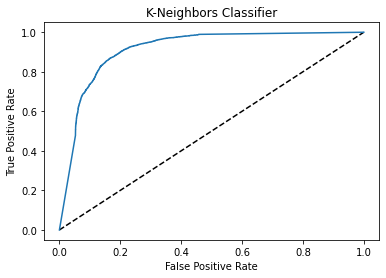

In [283]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('K-Neighbors Classifier')
plt.show()

In [284]:
auc_score=roc_auc_score(y_test,Final_Model.predict(x_test))
print((auc_score)*100)

96.12381268486597


# We got better score than Random Forest

In [285]:
#Saving the model

joblib.dump(Final_Model,'Census_Income_knn.pkl')

['Census_Income_knn.pkl']

Text(0.5, 0, 'Permutation Importance')

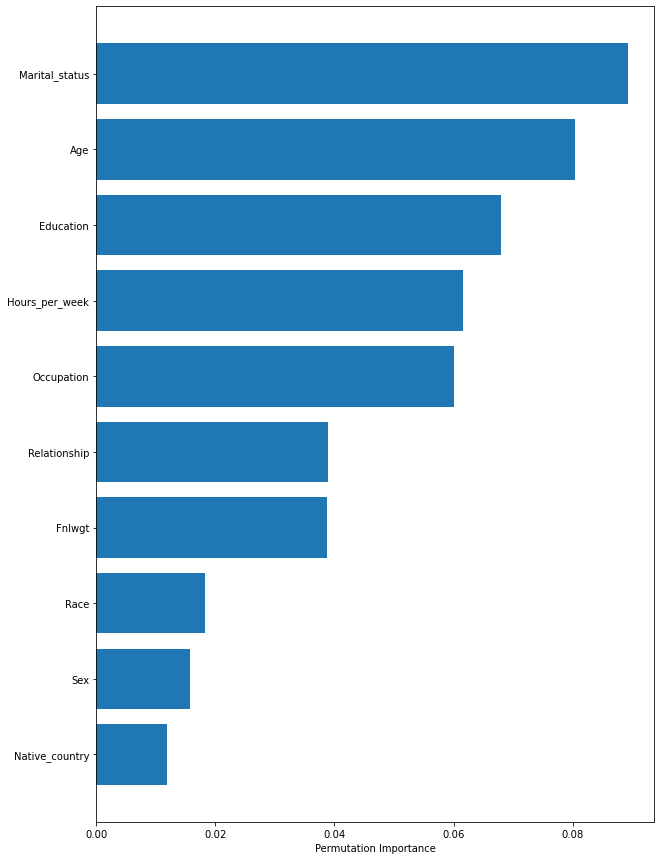

In [286]:
#To check feature Importance for KNN Final Model 

from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(final_model, x_test, y_test)

plt.figure(figsize=[10,15])
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(x.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

### Marital status, age, education and Hours per week are the important features as per knn algorithm

## Predictions

In [287]:
# Loading the saved model
model=joblib.load("Census_Income_knn.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 0, 1])

In [288]:
base1 = pd.DataFrame()
base1["actual"] = y_test
base1["predictions"] = prediction

In [289]:
base1

,actual,predictions
17310,0,0
570,0,0
26734,0,0
2338,0,0
46113,1,1
...,...,...
17888,0,0
10405,0,0
27658,0,0
30147,0,0


In [290]:
base1['difference']=base1['actual']-base1['predictions']
base1

,actual,predictions,difference
17310,0,0,0
570,0,0,0
26734,0,0,0
2338,0,0,0
46113,1,1,0
...,...,...,...
17888,0,0,0
10405,0,0,0
27658,0,0,0
30147,0,0,0


In [291]:
print(base1['difference'].value_counts())

 0    13874
-1      304
 1      255
Name: difference, dtype: int64


## We get 13874 right predictions and only 559 wrong predictions for our KNN Model. Hence Knn is the best model in this dataset. 

## We have only 4% error in this model.

### Hence, I proved Knn is the best model even though accuracy and cv score was less but AUC has proved 96% of success which is true and we can see from above figures.